# Implementation of Logistic Regression with L2 Regularization

In [33]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [34]:
X_train = [[0.346,0.780], [0.303,0.439],[0.358,0.729],[0.602,0.863],[0.790,0.753],[0.611,0.965]]
y_train = [0,0,0,1,1,1]

X_test = [[0.959,0.382], [0.750,0.306], [0.395,0.760], [0.823,0.764], [0.761,0.874], [0.844,0.435]]
y_test = [0,0,0,1,1,1]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [35]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat, W, lambda1):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))+ np.mean(lambda1/(2) * np.dot(W,W))

    return loss

def gradients(X, y, y_hat,w, lambda1):

    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))+ (1/m)*(lambda1*w)
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def plot_decision_boundary(X, y, w, b):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 =np.multiply(x1,m) + c
    
    # Plotting
    fig = plt.figure
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Decision Boundary')   
    plt.plot(x1, x2, 'y-')


In [36]:
def train(X, y, epochs, lr):
 
    m, n = X.shape
    
    # Initializing weights and bias.
    w = np.array([1.5,0.5])
    b = -1
    
    # Empty list to store losses.
    losses = []
    # Training loop.
    for epoch in range(epochs):
        for i in range(m):
            xb = X[i]
            yb = y[i]
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat,w,0.1)
            
            # Updating the parameters.
            w = w- lr*dw
            b = b- lr*db
            #print('The logistic model P(y=1|x1,x2) is: ',y_hat)
            #print('The updated value of w,b is: ')
            #print(w,b)
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b),w, 0.1)
        losses.append(l)
        if epoch == 1:
          print("Solution to 5b(i)")
          print('The updated value of w,b at the end of the epoch is:  \n',w,b)
          print("\n\n Solution to 5b(ii)")
          print('The logistic model P(y=1|x1,x2) is: \n', y_hat)
          print("Corresponding cross entropy function = \n",l)
        if(epoch%(epochs/10) == 0):
          print("Cost after", epoch, "epoch is: ", l)
    # returning weights, bias and losses(List).
    return w, b, losses   

In [37]:
def predict(X):
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []    
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

Cost after 0 epoch is:  0.6793333930895056
Solution to 5b(i)
The updated value of w,b at the end of the epoch is:  
 [1.45104757 0.49269336] -1.0073819919017042


 Solution to 5b(ii)
The logistic model P(y=1|x1,x2) is: 
 0.577540312892111
Corresponding cross entropy function = 
 0.6770734435545663
Cost after 2500 epoch is:  0.6502117844648301
Cost after 5000 epoch is:  0.6502117844648301
Cost after 7500 epoch is:  0.6502117844648301
Cost after 10000 epoch is:  0.6502117844648301
Cost after 12500 epoch is:  0.6502117844648301
Cost after 15000 epoch is:  0.6502117844648301
Cost after 17500 epoch is:  0.6502117844648301
Cost after 20000 epoch is:  0.6502117844648301
Cost after 22500 epoch is:  0.6502117844648301


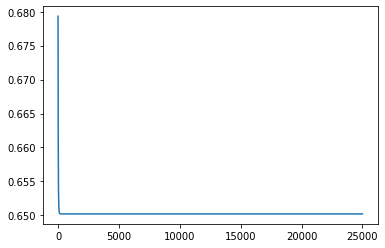

In [38]:
# Training 
w, b, l = train(X_train, y_train, epochs=25000, lr=0.1)# Plotting Decision Boundary
plt.plot(np.arange(25000),l)

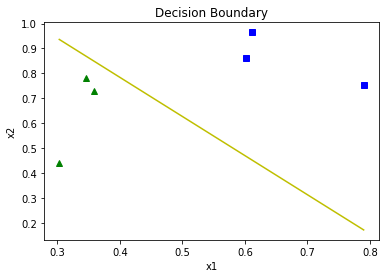

In [39]:
plot_decision_boundary(X_train, y_train, w, b)

In [40]:
tp = sum((y_test == 1) & (predict(X_test) == 1))
tn = sum((y_test == 0) & (predict(X_test) == 0))
fn = sum((y_test == 1) & (predict(X_test) == 0))
fp = sum((y_test == 0) & (predict(X_test) == 1))
print('\n\n The solution to 5b(iii) \n')
accuracy = ((tp + tn) * 100)/ float( tp + tn + fn + fp)
precision = (tp  * 100)/ float( tp + fp)
recall = (tp  * 100)/ float( tp + fn)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall:  ', recall)



 The solution to 5b(iii) 

Accuracy:  66.66666666666667
Precision:  60.0
Recall:   100.0


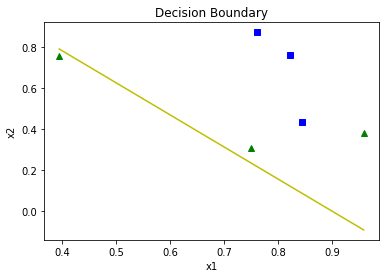

In [41]:
plot_decision_boundary(X_test, y_test, w, b)